#### Exp 4 : Perceptron Learning Law with its decision regions

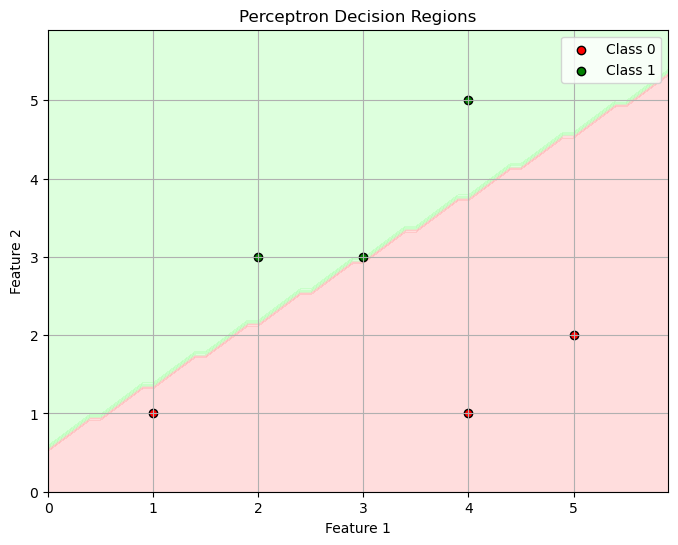

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Create linearly separable data
X = np.array([
    [2, 3],
    [3, 3],
    [4, 5],
    [1, 1],
    [5, 2],
    [4, 1]
])
y = np.array([1, 1, 1, 0, 0, 0])  # Class labels

# Step 2: Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.lr * (target - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        return self.activation(np.dot(X, self.weights) + self.bias)

# Step 3: Train perceptron
p = Perceptron(learning_rate=0.1, epochs=10)
p.fit(X, y)

# Step 4: Plotting decision regions
def plot_decision_regions(X, y, classifier):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ['red', 'green']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    for idx, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    c=cmap_bold[idx], label=f"Class {label}", edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Regions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_regions(X, y, classifier=p)
